### Crab Age Prediction

#### This is regression type of problem in which we will try to prredict the age of crabs.

https://www.kaggle.com/datasets/sidhus/crab-age-prediction

#### Attribute information

#### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from fancyimpute import IterativeImputer
import regex as re

#### Loading the dataset

In [2]:
data = pd.read_csv("CrabAgePrediction.csv")
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,3893.0,1.311306,0.300431,0.187500,1.125000,1.362500,1.537500,2.037500
Diameter,3893.0,1.020893,0.248233,0.137500,0.875000,1.062500,1.200000,1.625000
Height,3893.0,0.349374,0.104976,0.000000,0.287500,0.362500,0.412500,2.825000
Weight,3893.0,23.567275,13.891201,0.056699,12.672227,22.792998,32.786197,80.101512
Shucked Weight,3893.0,10.207342,6.275275,0.028349,5.343881,9.539607,14.273973,42.184056
Viscera Weight,3893.0,5.136546,3.104133,0.014175,2.664853,4.861939,7.200773,21.545620
Shell Weight,3893.0,6.795844,3.943392,0.042524,3.713785,6.662133,9.355335,28.491248
Age,3893.0,9.954791,3.220967,1.000000,8.000000,10.000000,11.000000,29.000000


In [5]:
data.shape

(3893, 9)

#### Checking for null values

In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [7]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

#### Dataset is free of null values 

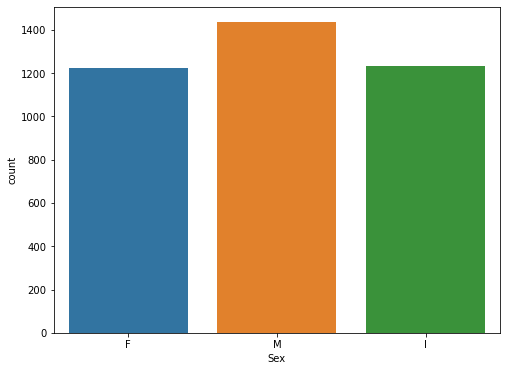

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data.Sex);

#### Checking for outlier

##### Boxplot

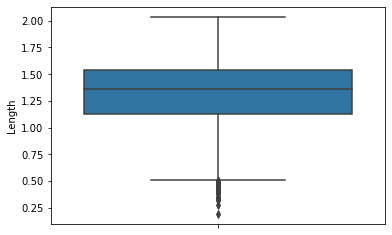

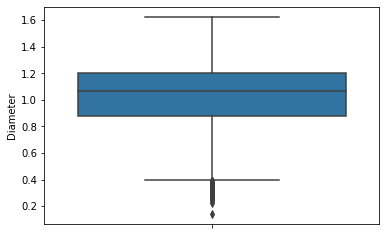

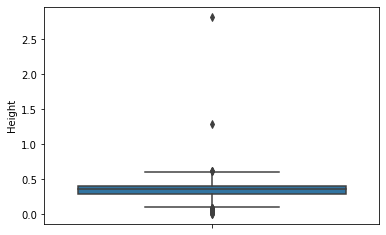

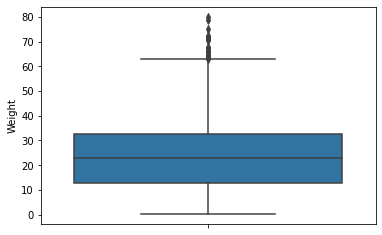

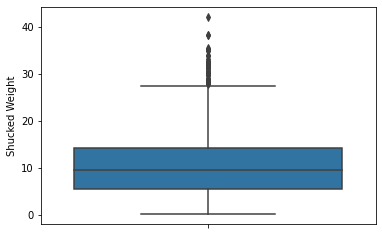

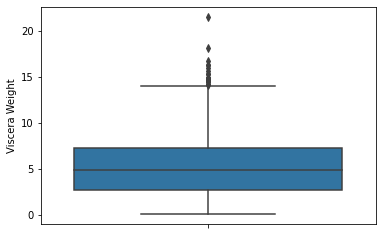

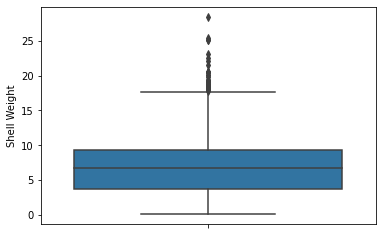

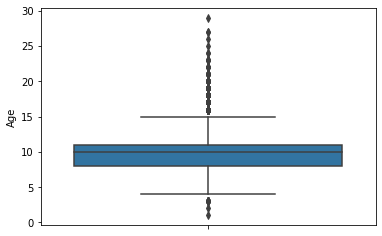

In [9]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y = data[i])
        plt.show();

#### Setting the outlier limits

In [10]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [11]:
for i in data.columns:
    if data[i].dtypes != "object":
        UL,LL = outlier_limit(data[i])
        data[i] = np.where((data[i]>UL)|(data[i]<LL), np.nan, data[i])

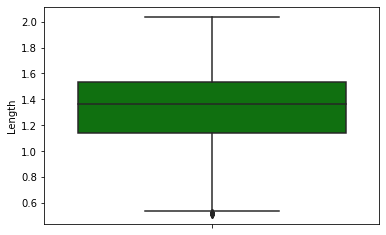

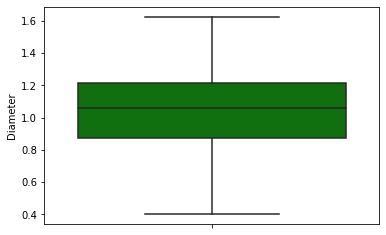

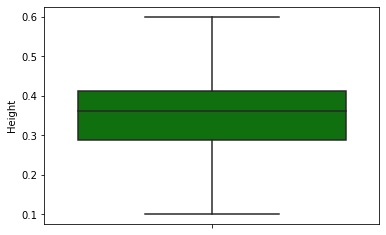

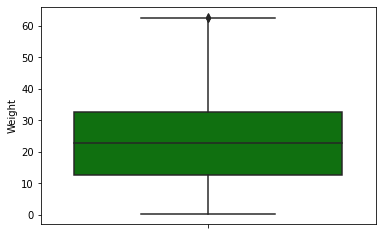

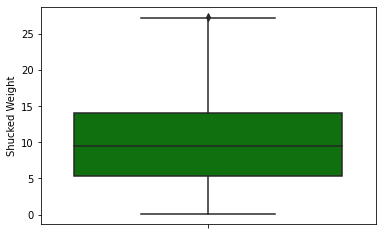

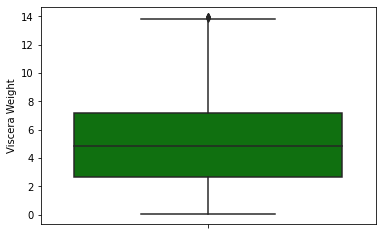

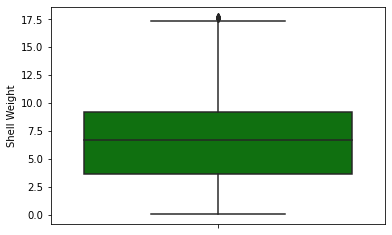

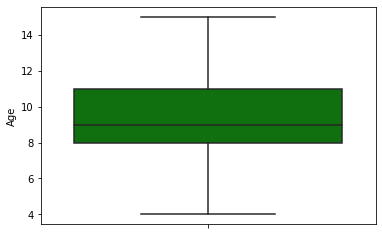

In [12]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y = data[i], color="green")
        plt.show();

#####  We have treated the outliers. Lets drop the nan values. 

In [13]:
data.dropna(inplace=True)

#### Hisplot

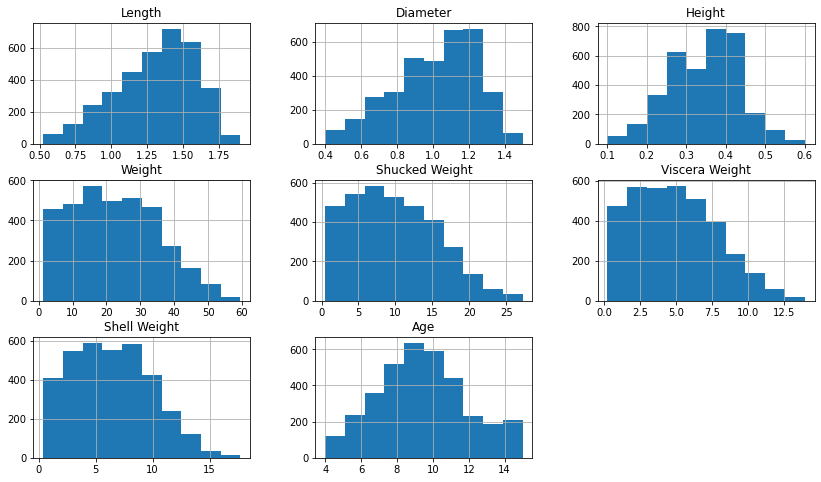

In [14]:
data.hist(figsize=(14,8));

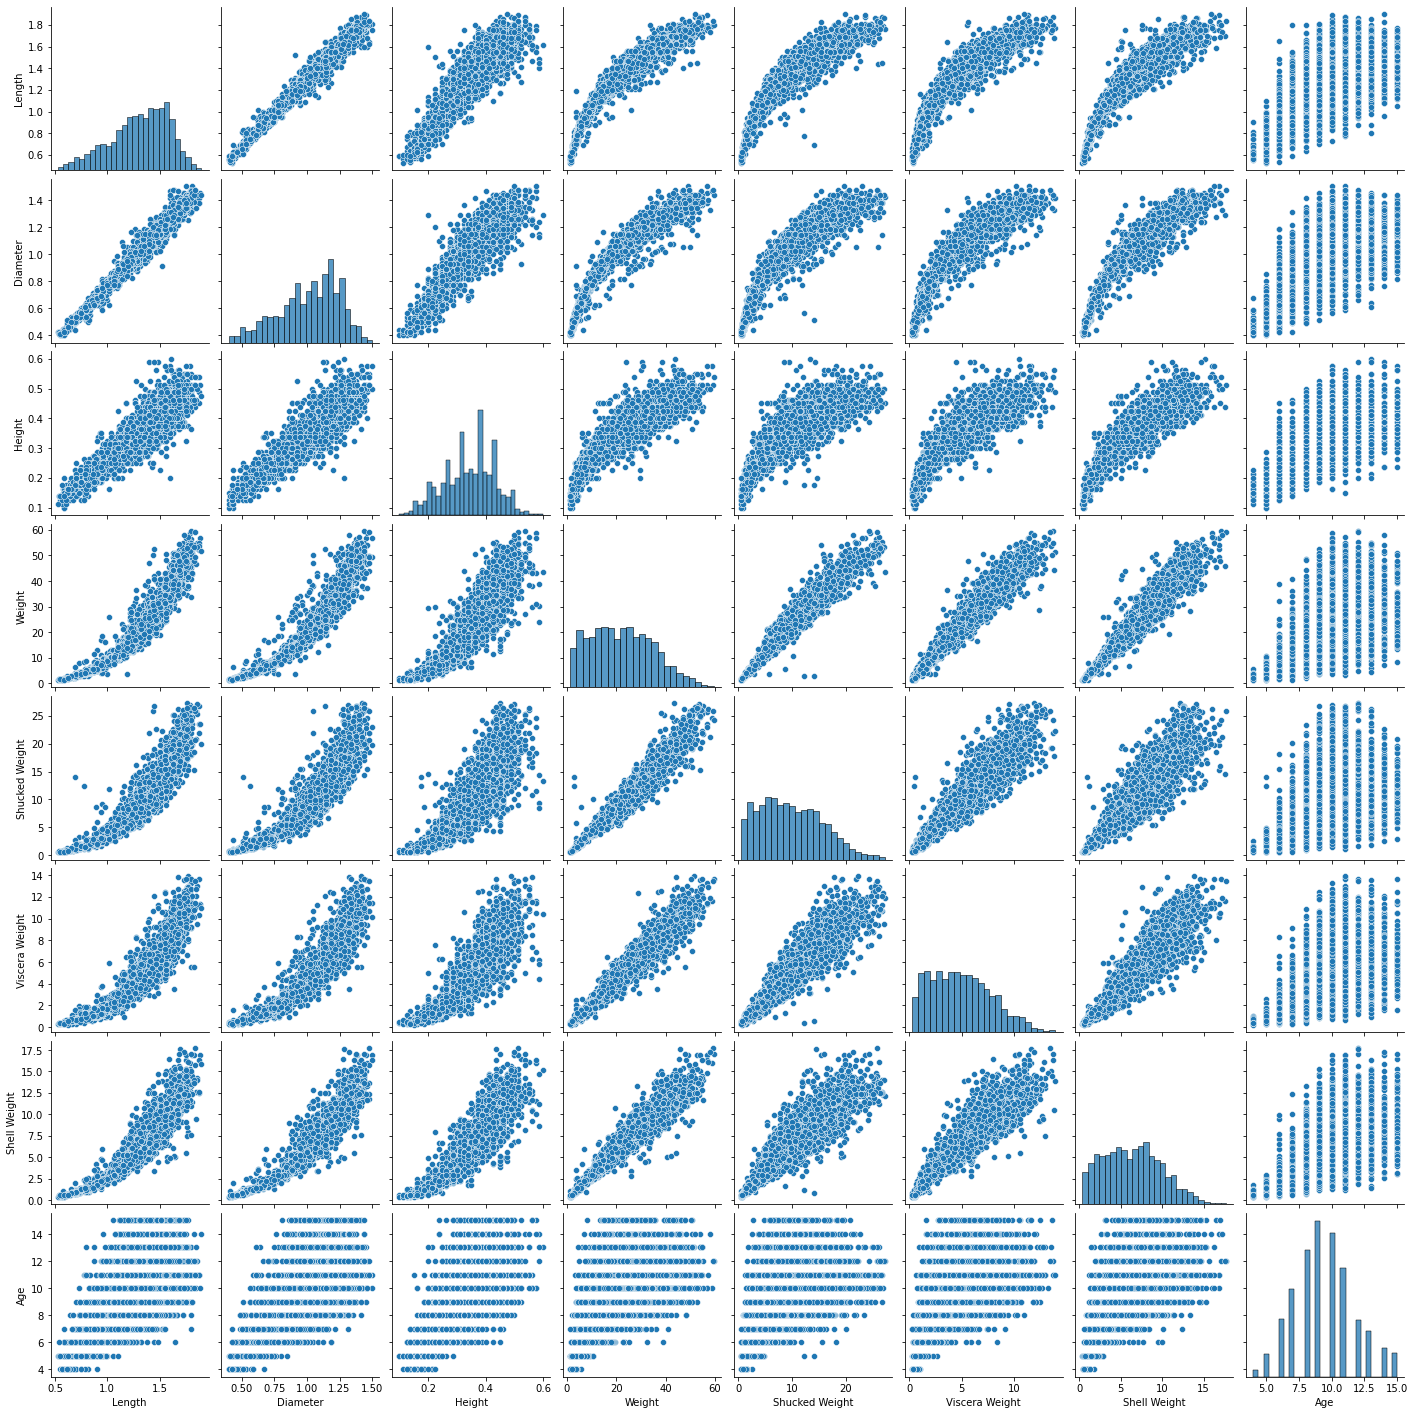

In [15]:
sns.pairplot(data);

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3526 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3526 non-null   object 
 1   Length          3526 non-null   float64
 2   Diameter        3526 non-null   float64
 3   Height          3526 non-null   float64
 4   Weight          3526 non-null   float64
 5   Shucked Weight  3526 non-null   float64
 6   Viscera Weight  3526 non-null   float64
 7   Shell Weight    3526 non-null   float64
 8   Age             3526 non-null   float64
dtypes: float64(8), object(1)
memory usage: 275.5+ KB


#### Converting the categorical column "Sex" into numerical:

In [17]:
data.Sex.unique()

array(['F', 'M', 'I'], dtype=object)

In [18]:
data.Sex.replace({"F":0, "M":1, "I":2}, inplace=True)

##### Lets change the data type of "Age" column as "int"

In [19]:
data["Age"] = data["Age"].astype("int")

#### Correlation matrix

<AxesSubplot:>

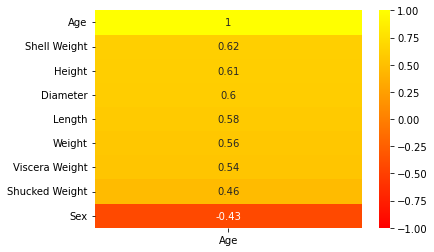

In [20]:
sns.heatmap(data.corr()[["Age"]].sort_values(by="Age", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn")

#### Except the "Sex" column, all other features are positively correlated.  We may neglect the same.

##### Feature selection

In [21]:
x = data[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight','Viscera Weight', 'Shell Weight']].values

In [22]:
y = data["Age"].values

#### Scaling the data

In [23]:
sc = StandardScaler()

In [24]:
x = sc.fit_transform(x)

#### Splitting the data into training and testing set

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##### Model building

In [26]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

In [27]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  49.91323491255343
training_score:  48.17101307127511
testing_score:  49.91323491255343
mae:  1.2963150778332182
mse:  2.7860067201488046
rmse_test:  1.669133523762795
****************************************************************************************************
model trained with Ridge
r2score:  49.89406270817616
training_score:  48.169095734428005
testing_score:  49.89406270817616
mae:  1.2960372519015106
mse:  2.7870731473804673
rmse_test:  1.6694529485374745
****************************************************************************************************
model trained with LinearSVR
r2score:  48.15690647951937
training_score:  46.51850309738037
testing_score:  48.15690647951937
mae:  1.2752238250889028
mse:  2.8837000490886626
rmse_test:  1.6981460623540787
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  9.524429563268422
trai

##### Random Forest Regressor is having the best perfomance. Lets try to increase its accuray by Hyper parameter tuning. 

In [28]:
rfr = RandomForestRegressor(random_state=0)

#### Create the parameter grid based on the results of random search 

In [29]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,25,50,100],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4,6,8,10],
    'n_estimators': [100,200,300]
}

In [30]:
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [31]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 25, 50, 100],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [32]:
grid_search.best_score_

0.526814686014122

In [33]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [34]:
RFR = RandomForestRegressor(n_estimators=200, bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, random_state=0)

In [35]:
RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=25, max_features=2, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=200, random_state=0)

##### Metrics after Hyperparameter tuning

In [36]:
training_score = RFR.score(x_train, y_train)*100
testing_score = RFR.score(x_test, y_test)*100
score = r2_score(y_test, RFR.predict(x_test))*100
mae = mean_absolute_error(y_test, RFR.predict(x_test))
mse = mean_squared_error(y_test, RFR.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

r2score:  52.99797419241574
training_score:  76.5999714135694
testing_score:  52.99797419241574
mae:  1.2359343530278295
mse:  2.614422383476254
rmse_test:  1.616917556177882


##### We have improved the accuracy of the model. Lets proceed to prediction part.

In [37]:
y_pred = RFR.predict(x)

##### Saving the prediction in a Dataframe

In [38]:
OUPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"))

In [39]:
OUPUT.head()

,ACTUAL,PREDICTED
0,9,9.290235
1,6,6.420500
2,6,8.503698
3,10,9.854056
4,6,7.055159


##### Visualizing the prediction:

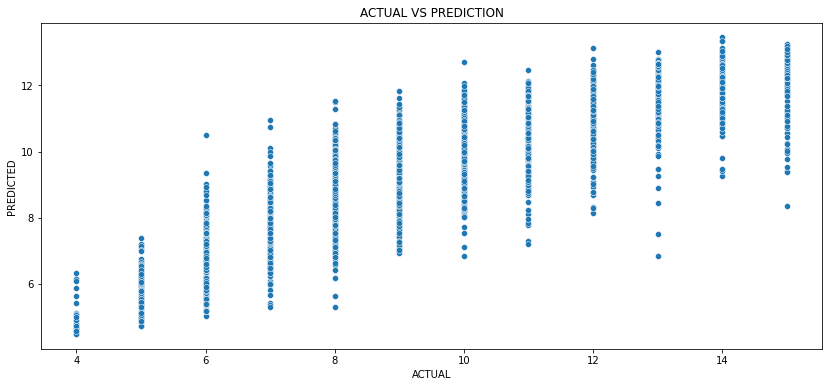

In [40]:
plt.figure(figsize=(14,6))
sns.scatterplot(data = OUPUT, x="ACTUAL", y = "PREDICTED")
plt.title("ACTUAL VS PREDICTION")
plt.show();